In [1]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import pickle



In [2]:
input=pd.read_csv("./trainingData.csv")

In [3]:
input.head(2)

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0


## Descriptive Analysis ##

In [4]:
print ("Shape \n",input.shape)
print ("--------")
print ("Data-Types \n",input.dtypes.value_counts())
print ("--------")
# print (input.dtypes)
# print (input.isnull().any())
print ("Null Values \n",input.isnull().any().value_counts())
print ("--------")
print ("Feature wise Null Values in % \n",input.isnull().sum()*100/input.shape[0])


Shape 
 (40000, 21)
--------
Data-Types 
 float64    7
object     7
int64      7
dtype: int64
--------
Null Values 
 False    11
True     10
dtype: int64
--------
Feature wise Null Values in % 
 Id                        0.0000
city                      4.6600
age                       0.0000
sex                       0.0000
social_class             13.1375
primary_business          0.0650
secondary_business       13.1025
annual_income             0.0000
monthly_expenses          0.3000
old_dependents            0.0000
young_dependents          0.0000
home_ownership            0.9475
type_of_house             1.7350
occupants_count           0.0000
house_area                0.0000
sanitary_availability     0.5200
water_availabity         13.1325
loan_purpose              0.0650
loan_tenure               0.0000
loan_installments         0.0000
loan_amount               0.0000
dtype: float64


## Insight 1 : Data has NULL values 


## Descriptive Analysis for Numerical Features####



In [5]:
numerical_cols = input.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_cols = input.select_dtypes(include=['object']).columns.tolist()

In [6]:
print ("Total Numerical columns:",len(numerical_cols))
print ("Total categorical columns:",len(categorical_cols))

Total Numerical columns: 14
Total categorical columns: 7


In [7]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [8]:
input.sample(2)

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
16600,16601,Parola,24,F,OBC,Hand cart puller,none,35000.0,1500.0,0,2,1.0,T2,1,600.0,0.0,0.5,Transportation Services,12,50,10000.0
5524,5525,PUSAD,40,F,MUSLIM,Centering Work,Others,24000.0,4500.0,0,0,1.0,T2,4,800.0,1.0,0.5,Construction Related Activities,12,12,7500.0


In [9]:
### Removing the id for corelation 
@interact
def check(column = numerical_cols[1:],
          column2 = numerical_cols[1:]):
    print("Correlation : ",input[column].corr(input[column2]))

interactive(children=(Dropdown(description='column', options=('age', 'annual_income', 'monthly_expenses', 'old…

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# @interact_manual
@interact.options(manual=True, manual_name="Scatter-Plot")
def check(column = numerical_cols[1:],
          column2 = numerical_cols[1:]):
    sns.scatterplot(input[column], input[column2])
    plt.show()

interactive(children=(Dropdown(description='column', options=('age', 'annual_income', 'monthly_expenses', 'old…

## Insight 2 : Data has Outlier in ost of the features such as ['age','annual_income','monthly_expenses','occupants_count','house_area','loan_installments']

#### Measures Of Central Tendency
##### Mean
##### Median
##### Mode

#### Measures Of Spread
##### Range
##### Outliers
##### Interquantile Range
##### Variance

#### Dependence
##### Correlation v/s Causation
##### Covariance

In [11]:
print ("loan_amount")
mean = np.mean(input['loan_amount'])
print("Mean :",mean)

mode = input['loan_amount'].mode().iloc[0]
print("Mode :",mode)
### IQR 

# Median
median = np.median(input['loan_amount'])
print("Median :",median)

# lower quartile  
q1 = input['loan_amount'].quantile(0.25)

# upper quartile
q3 = input['loan_amount'].quantile(0.75)

# printing Results
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

loan_amount
Mean : 8412.5925
Mode : 5000.0
Median : 8000.0
Q1: 5000.0
Q3: 10000.0
IQR: 5000.0


In [12]:
# stats at a glance
@interact
def check(column = numerical_cols[1:]):
    return input[column].agg(['max','min','mean','median','std','sum','count']).astype("int64")

interactive(children=(Dropdown(description='column', options=('age', 'annual_income', 'monthly_expenses', 'old…

0.01     3000.0
0.05     5000.0
0.10     5000.0
0.30     5000.0
0.50     8000.0
0.70    10000.0
0.90    12000.0
0.95    15000.0
0.99    15000.0
Name: loan_amount, dtype: float64


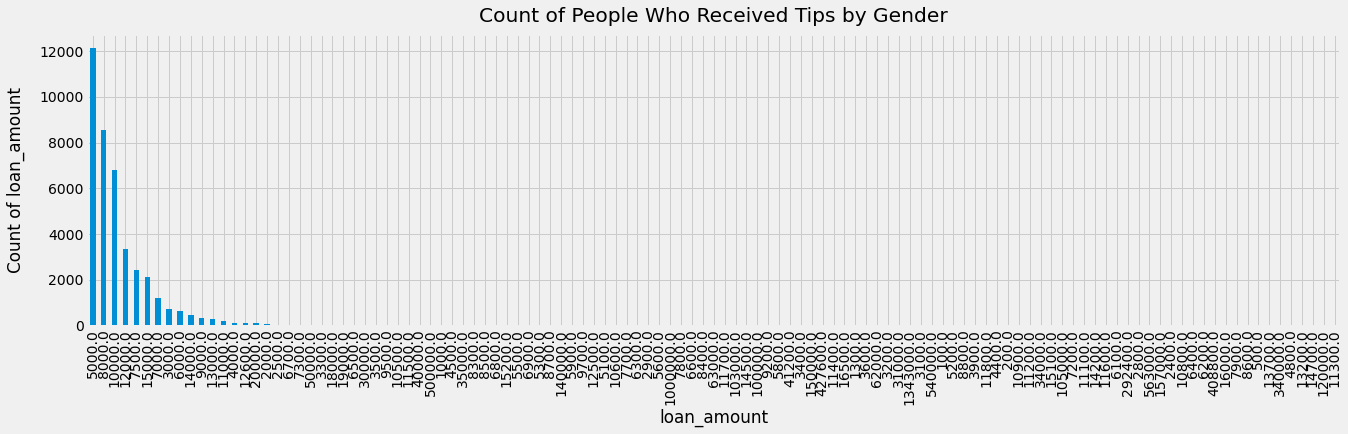

In [13]:
## loan amount distribution
print(input.loan_amount.quantile([.01,.05,.1,.3,.5,.7,.9,.95,.99]))
input['loan_amount'].value_counts().plot(kind="bar",figsize=[20,5])
plt.xlabel("loan_amount")
plt.ylabel("Count of loan_amount", labelpad=14)
plt.title("Count of People Who Received Tips by Gender", y=1.02);

In [14]:


# for that we have to find the upper and ower outlier limit
outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print("Outlier Upper Limit :", outlier_lower_limit)
print("Outlier Lower Limit :", outlier_upper_limit)

Outlier Upper Limit : -2500.0
Outlier Lower Limit : 17500.0


In [15]:
# loan_amount = input['loan_amount']

# lower_limit_outliers = loan_amount[loan_amount < outlier_lower_limit].count()

# upper_limit_outliers = loan_amount[loan_amount > outlier_upper_limit].count()

# print("lower_limit_outliers:", lower_limit_outliers)
# print("upper_limit_outliers:", upper_limit_outliers)
# print("total outliers:", upper_limit_outliers + lower_limit_outliers)

## Insight 3: Data is left skewed 

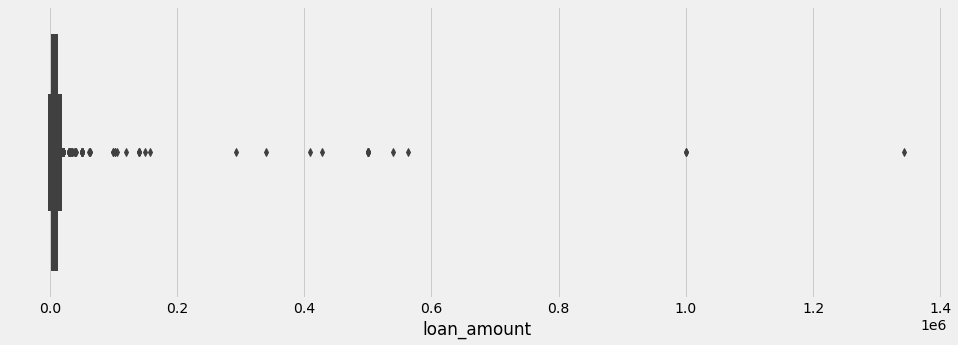

In [16]:
sns.boxplot(input['loan_amount'])
plt.show()

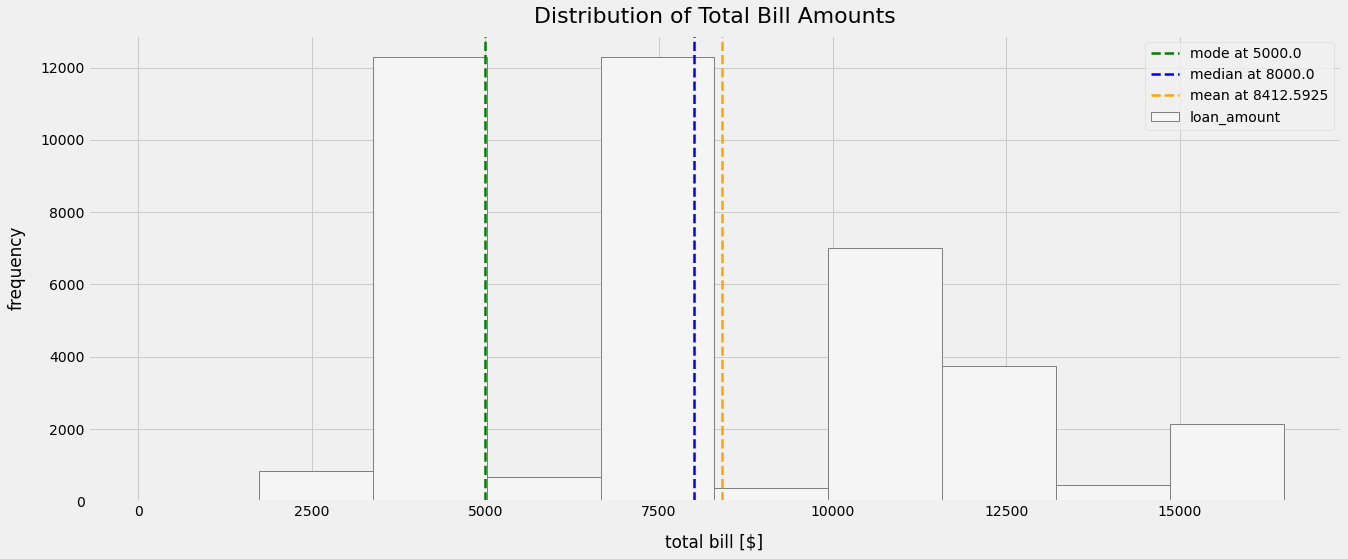

In [17]:
input.loc[input.loan_amount<17500,'loan_amount'].plot(kind='hist', figsize=(20, 8), linewidth=1, color='whitesmoke', edgecolor='gray')
plt.xlabel("total bill [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Total Bill Amounts", y=1.012, fontsize=22)
measurements = [mode, median, mean]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

In [18]:
# Returns Pearson product-moment correlation coefficients.
input.corr()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.000000,-0.004114,0.472447,-0.021413,0.044053,0.109523,0.095202,0.007440,0.037266,0.003357,0.433107,-0.062596,-0.225166,0.141249
age,-0.004114,1.000000,-0.006414,-0.003101,-0.000691,-0.005837,0.000937,-0.000031,-0.000586,-0.007487,-0.001627,-0.000233,-0.003040,-0.001969
annual_income,0.472447,-0.006414,1.000000,0.112499,0.062216,0.239864,0.011885,0.003999,0.033902,0.241509,0.280939,-0.027618,-0.119936,0.085632
monthly_expenses,-0.021413,-0.003101,0.112499,1.000000,-0.003522,0.028754,-0.047173,0.001320,-0.008270,0.059819,0.078061,-0.013020,0.113914,0.019569
old_dependents,0.044053,-0.000691,0.062216,-0.003522,1.000000,-0.093778,0.008586,-0.000987,0.010852,0.029027,-0.017931,-0.022390,-0.033921,0.006997
young_dependents,0.109523,-0.005837,0.239864,0.028754,-0.093778,1.000000,0.025205,0.004192,0.017877,0.227446,-0.025687,-0.015778,-0.064783,0.006200
home_ownership,0.095202,0.000937,0.011885,-0.047173,0.008586,0.025205,1.000000,0.000867,0.009548,0.040946,0.018611,-0.098331,0.021205,0.001939
occupants_count,0.007440,-0.000031,0.003999,0.001320,-0.000987,0.004192,0.000867,1.000000,-0.000263,0.003550,0.005204,-0.000133,-0.002887,-0.000125
house_area,0.037266,-0.000586,0.033902,-0.008270,0.010852,0.017877,0.009548,-0.000263,1.000000,0.040755,0.001440,0.001177,-0.027506,0.002874
sanitary_availability,0.003357,-0.007487,0.241509,0.059819,0.029027,0.227446,0.040946,0.003550,0.040755,1.000000,0.141974,0.007674,0.175375,0.042241


In [19]:
input.cov()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.333367e+08,-1.819687e+05,1.567838e+08,-1.135512e+06,112.929373,1358.057801,179.976975,4.080564e+05,1.978109e+06,17.987926,1291.953080,-988.415373,-43374.863709,2.217690e+07
age,-1.819687e+05,1.467162e+07,-7.061056e+05,-5.464164e+04,-0.587569,-24.009898,0.590106,-5.575244e+02,-1.031259e+04,-13.342021,-0.003696,-1.220608,-194.276019,-1.025358e+05
annual_income,1.567838e+08,-7.061056e+05,8.259368e+08,1.483347e+07,396.945546,7402.507540,55.673674,5.459241e+05,4.478863e+06,3214.601362,1903.627856,-1085.380544,-57501.996490,3.346178e+07
monthly_expenses,-1.135512e+06,-5.464164e+04,1.483347e+07,2.109526e+07,-3.595933,141.788918,-35.504142,2.884606e+04,-1.748658e+05,127.613657,97.492530,-81.896447,8734.969410,1.223873e+06
old_dependents,1.129294e+02,-5.875692e-01,3.969455e+02,-3.595933e+00,0.049285,-0.022356,0.000313,-1.040582e+00,1.107484e+01,0.002998,-0.001087,-0.006797,-0.125630,2.112012e+01
young_dependents,1.358058e+03,-2.400990e+01,7.402508e+03,1.417889e+02,-0.022356,1.153132,0.004424,2.138110e+01,8.824948e+01,0.113297,-0.006887,-0.023169,-1.160536,9.052833e+01
home_ownership,1.799770e+02,5.901059e-01,5.567367e+01,-3.550414e+01,0.000313,0.004424,0.026755,6.770435e-01,7.213150e+00,0.003095,0.000706,-0.021972,0.057952,4.330981e+00
occupants_count,4.080564e+05,-5.575244e+02,5.459241e+05,2.884606e+04,-1.040582,21.381103,0.677044,2.256246e+07,-5.741479e+03,7.845785,6.772572,-0.866428,-228.754382,-8.056606e+03
house_area,1.978109e+06,-1.031259e+04,4.478863e+06,-1.748658e+05,11.074844,88.249475,7.213150,-5.741479e+03,2.113169e+07,87.157363,1.811342,7.396352,-2109.409741,1.796525e+05
sanitary_availability,1.798793e+01,-1.334202e+01,3.214601e+03,1.276137e+02,0.002998,0.113297,0.003095,7.845785e+00,8.715736e+01,0.215322,0.014870,0.004882,1.358938,2.671571e+02


## Exploring Categorical Data 

In [20]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# @interact_manual
@interact.options(manual=True, manual_name="Box-Plot")
def check(column1 = list(input.select_dtypes('object').columns),
          column2 = numerical_cols):
    sns.boxplot(input[column1], input[column2])
    plt.show()

interactive(children=(Dropdown(description='column1', options=('city', 'sex', 'social_class', 'primary_busines…

In [21]:
# Annual income outliers are mostly in Female sex

In [22]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
@interact.options(manual=True, manual_name="# Labels in Category")
def check(column = categorical_cols):
    plt.figure(figsize=(40,15))
    s= input[column].value_counts(normalize=True)*100
    ax=s.plot.bar(width=.4,x=column)
    ax.set_xlabel(column,fontsize=30, color='purple')
    ax.set_ylabel("% Distribution",fontsize=30, color='green')
    for i, v in s.reset_index().iterrows():
        ax.text(i, v[column] + 0.4 , v[column], color='red',fontsize=30)
     
    plt.show()

interactive(children=(Dropdown(description='column', options=('city', 'sex', 'social_class', 'primary_business…

In [23]:
# All stats at one place
@interact
def check(column = list(input.select_dtypes('object').columns)):
    return input[[column,'loan_amount']].groupby(column).agg(['max','min','mean','median','std','sum','count'])

interactive(children=(Dropdown(description='column', options=('city', 'sex', 'social_class', 'primary_business…

In [24]:
categorical_cols

['city',
 'sex',
 'social_class',
 'primary_business',
 'secondary_business',
 'type_of_house',
 'loan_purpose']

## Insight4: As there are outliers and Missing values , we need to treat them

In [25]:
print ("Feature wise Null Values in % \n",input.isnull().sum()*100/input.shape[0])


Feature wise Null Values in % 
 Id                        0.0000
city                      4.6600
age                       0.0000
sex                       0.0000
social_class             13.1375
primary_business          0.0650
secondary_business       13.1025
annual_income             0.0000
monthly_expenses          0.3000
old_dependents            0.0000
young_dependents          0.0000
home_ownership            0.9475
type_of_house             1.7350
occupants_count           0.0000
house_area                0.0000
sanitary_availability     0.5200
water_availabity         13.1325
loan_purpose              0.0650
loan_tenure               0.0000
loan_installments         0.0000
loan_amount               0.0000
dtype: float64


In [26]:
# Winsorization
for col in  numerical_cols[1:-1]:
#     Q1 = input[col].quantile(0.25)
#     Q3 = input[col].quantile(0.75)
#     IQR = Q3 - Q1
#     ilr=Q1 - 1.5 * IQR
#     olr=Q3 + 1.5 * IQR
    ilr = input[col].quantile(0.05)
    olr = input[col].quantile(0.95)
    
#     print("Col","      ","5th_percentile","95th_percentile","Shape_with_higherthan_5th_perc","Shape_with_lessthan_95th_perc")
    print(col, "      ",ilr,olr,input.loc[(input[col]<ilr)].shape,input.loc[(input[col]>olr)].shape)
    
#     input.loc[(input[col]<ilr),col]=ilr
#     input.loc[(input[col]>olr),col]=olr
#     inputNew = input[~((input < (Q1 - 1.5 * IQR)) |(input > (Q3 + 1.5 * IQR))).any(axis=1)]

age        22.0 51.0 (1268, 21) (1891, 21)
annual_income        0.0 80000.0 (0, 21) (1922, 21)
monthly_expenses        1500.0 6000.0 (1073, 21) (1482, 21)
old_dependents        0.0 0.0 (0, 21) (1669, 21)
young_dependents        0.0 3.0 (0, 21) (733, 21)
home_ownership        1.0 1.0 (1090, 21) (0, 21)
occupants_count        0.0 5.0 (0, 21) (961, 21)
house_area        0.0 1500.0 (0, 21) (1568, 21)
sanitary_availability        0.0 1.0 (1, 21) (0, 21)
water_availabity        0.5 1.0 (183, 21) (0, 21)
loan_tenure        12.0 12.0 (384, 21) (322, 21)
loan_installments        12.0 50.0 (468, 21) (160, 21)


## Model Training

In [27]:
# input=pd.read_csv("./trainingData.csv")


### Text Cleaning

In [28]:
input.city=input.city.str.lower()
input['city']=input['city'].str.replace(".","").str.replace(" ","")
input['social_class']=input['social_class'].str.lower()
input['social_class']=input['social_class'].str.replace(".","").str.replace(" ","")
input['primary_business']=input['primary_business'].str.lower().str.replace(" business","").str.replace("business","")
input['loan_purpose']=input['loan_purpose'].str.lower().str.replace(" business","").str.replace("business","")


### Outlier Treatment

In [29]:
# Winsorization
# for col in  numerical_cols[1:-1]:
for col in  ['age','annual_income','monthly_expenses','occupants_count','house_area','loan_installments']:
    ilr = input[col].quantile(0.05)
    olr = input[col].quantile(0.95)
    print(col, ilr,olr,input.loc[(input[col]<ilr)].shape,input.loc[(input[col]>olr)].shape)
    input.loc[(input[col]<ilr),col]=ilr
    input.loc[(input[col]>olr),col]=olr

age 22.0 51.0 (1268, 21) (1891, 21)
annual_income 0.0 80000.0 (0, 21) (1922, 21)
monthly_expenses 1500.0 6000.0 (1073, 21) (1482, 21)
occupants_count 0.0 5.0 (0, 21) (961, 21)
house_area 0.0 1500.0 (0, 21) (1568, 21)
loan_installments 12.0 50.0 (468, 21) (160, 21)


### NULL Value Treatment

In [30]:
# input=input.dropna(subset=['city','monthly_expenses','primary_business','home_ownership','type_of_house','sanitary_availability','loan_purpose'])
print(input.shape)
input=input.dropna(subset=['monthly_expenses','primary_business','home_ownership','type_of_house','sanitary_availability','loan_purpose'])
print(input.shape)

input.loc[(input["loan_amount"]<2000),"loan_amount"]=2000
input.loc[(input["loan_amount"]>17500),"loan_amount"]=17500
print(input.shape)

(40000, 21)
(39019, 21)
(39019, 21)


In [31]:
# input['water_availabity'].fillna(input['water_availabity'].mode()[0], inplace=True)
# input['city'].fillna(input['city'].mode()[0], inplace=True)
# input['social_class'].fillna(input['social_class'].mode()[0], inplace=True)
# input['secondary_business'].fillna(input['secondary_business'].mode()[0], inplace=True)

In [32]:
input=input.fillna('blank')

In [33]:
print ("Feature wise Null Values in % \n",input.isnull().sum()*100/input.shape[0])

Feature wise Null Values in % 
 Id                       0.0
city                     0.0
age                      0.0
sex                      0.0
social_class             0.0
primary_business         0.0
secondary_business       0.0
annual_income            0.0
monthly_expenses         0.0
old_dependents           0.0
young_dependents         0.0
home_ownership           0.0
type_of_house            0.0
occupants_count          0.0
house_area               0.0
sanitary_availability    0.0
water_availabity         0.0
loan_purpose             0.0
loan_tenure              0.0
loan_installments        0.0
loan_amount              0.0
dtype: float64


In [34]:
def mean_response_impute(categs,col,data):
    for cat in categs:
        corr_response = np.mean(data[data[col]==cat]['loan_amount'])
        data[col] = data[col].replace(cat,corr_response)
    return

def target_encoding(cols,data):
    for c in cols:
        cats = pd.Categorical(data[c]).categories
        mean_response_impute(cats,c,data)
    return data

### Target Encoding of columns which has very high numbers of labels

In [35]:
categorical_cols2=["city" ,"social_class",
                   "primary_business"]

input= target_encoding(categorical_cols2,input)


In [36]:

input.loc[input["loan_purpose"].isin(["agarbatti","vocational loans","training","miscellaneous",
                                      "cyber caf_","professional","tuition centre","manufacturing",
                                      "recycling/ waste management"
                                     ]),"loan_purpose"]="others"

input.loc[input["loan_purpose"]=="agro basedes","loan_purpose"]="farming/ agriculture"
input.loc[input["loan_purpose"]=="artifical jewellry selling","loan_purpose"]="jewellry shop"
input.loc[input["loan_purpose"]=="food items","loan_purpose"]="eateries"
input.loc[input["loan_purpose"]=="meates","loan_purpose"]="eateries"
input.loc[input["loan_purpose"]=="retail sale","loan_purpose"]="retail store"

input.loc[input["loan_purpose"].isin(["tent services"," services - ii"," services - i","repair services","laundry services",
                                      "transportation services","cable tv services"
                                     ]),"loan_purpose"]="services"

### Train-Test Spilt

In [37]:
def train_test_split_data(X, y,size=80):
    rand = np.random.rand(X.shape[0])
    split = rand < np.percentile(rand, size)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    return X_train, y_train, X_test, y_test

In [38]:
X=input.drop(['loan_amount'],1)
y=input.loan_amount
# train_pct_index = int(0.8 * len(X))
# X_train, X_test = X[:train_pct_index], X[train_pct_index:]
# train_y, test_y = y[:train_pct_index], y[train_pct_index:]
X_train, train_y, X_test, test_y=train_test_split_data(X,y)


### One hot encode the categorical columns and normalize the numerical columns

In [39]:
categorical_cols1=["home_ownership" ,"sanitary_availability",
                   "old_dependents", "water_availabity","sex","secondary_business","type_of_house","loan_purpose"]

categorical_cols=categorical_cols1

In [40]:
train_cat1 = X_train[categorical_cols1]
test_cat1 = X_test[categorical_cols1]

train_cat_encoded= pd.get_dummies(train_cat1, columns = train_cat1.columns.tolist())
test_cat_encoded = pd.get_dummies(test_cat1 , columns = test_cat1.columns.tolist())


In [41]:
test_cat_encoded.shape

(7804, 42)

In [42]:
# drop the ids as unique identifier from the contious feature set

train_cont = X_train.drop(categorical_cols,1)
test_cont = X_test.drop(categorical_cols,1)

train_cont.drop(['Id'], 1,inplace=True)
test_cont.drop(['Id'], 1,inplace=True)

train_cont.fillna(train_cont.mean(), inplace=True)
test_cont.fillna(test_cont.mean(), inplace=True)


In [43]:
train_cont.head(2)

,city,age,social_class,primary_business,annual_income,monthly_expenses,young_dependents,occupants_count,house_area,loan_tenure,loan_installments
1,7500.00000,22.0,8480.701447,7864.531893,80000.0,3600.0,1,4.0,80.0,12,50.0
3,8722.14043,26.0,8480.701447,7864.531893,7000.0,5000.0,2,5.0,50.0,12,50.0


In [44]:
# Do normalization of the feature set and learn that norm values(mean and std dev) 
#                                     on train set and apply it on test and train

norm_values= train_cont.agg(["mean","std"])

train_cont_normalized = train_cont.apply(lambda x: (x- x.mean())/x.std())
train_cont_normalized.head()

######## normailising using train normalisers 
test_cont_normalized = test_cont - norm_values.loc["mean"]
test_cont_normalized = test_cont_normalized/norm_values.loc["std"]
test_cont_normalized.head()



,city,age,social_class,primary_business,annual_income,monthly_expenses,young_dependents,occupants_count,house_area,loan_tenure,loan_installments
0,-1.632627,-1.656172,-0.477823,-0.226364,-0.057763,1.348254,0.780535,0.853216,-1.046132,-0.005298,-0.59448
2,-1.632627,-1.418454,-1.753289,-0.058387,0.450251,0.476169,0.780535,0.853216,-1.097131,-0.005298,-0.59448
4,-1.974426,-1.537313,0.227917,-1.545972,-0.057763,0.040126,-1.083184,-1.218219,-0.939034,-0.005298,-0.59448
8,-1.632627,0.245569,-1.576438,-0.640167,-0.057763,1.348254,0.780535,1.543694,-1.097131,-0.005298,-0.59448
11,-1.632627,-1.180737,-1.576438,-0.640167,0.958264,1.348254,1.712394,1.543694,-1.097131,-0.005298,-0.59448


#### Concat the both cat and cont features

In [45]:
# concat the both cat and cont features
train_X= pd.concat([train_cat_encoded,train_cont_normalized],axis =1)
test_X = pd.concat([test_cat_encoded,test_cont_normalized],axis =1)


#### check if any ferature from training set missing in test set and remove them


In [46]:

columns=train_X.columns
missing_cols=set(columns)-set( test_X.columns )     
feature_difference_df = pd.DataFrame(data=np.zeros((test_X.shape[0], len(missing_cols))),
                                 columns=list(missing_cols))

# add "missing" features back to `test
test_X = test_X.join(feature_difference_df)
test_X=test_X[columns]

In [47]:
# check any null values left 
print(test_X.isnull().any().value_counts())
test_X.fillna(0, inplace=True)
train_X.fillna(0, inplace=True)
# val_X.fillna(0, inplace=True)

False    50
True      1
dtype: int64


In [48]:
print (train_X.shape)
train_X.head(2)

(31215, 51)


,home_ownership_0.0,home_ownership_1.0,sanitary_availability_0.0,sanitary_availability_1.0,old_dependents_0,old_dependents_1,old_dependents_2,water_availabity_0.0,water_availabity_0.5,water_availabity_1.0,water_availabity_blank,sex_F,sex_M,sex_TG,secondary_business_Agriculture,secondary_business_Daily wage labourer,secondary_business_Livestock rearing,secondary_business_Others,secondary_business_blank,secondary_business_none,type_of_house_R,type_of_house_T1,type_of_house_T2,loan_purpose_animal husbandry,loan_purpose_apparels,loan_purpose_beauty salon,loan_purpose_carpentery work,loan_purpose_construction related activities,loan_purpose_eateries,loan_purpose_education loan,loan_purpose_farming/ agriculture,loan_purpose_flower,loan_purpose_handicrafts,loan_purpose_jewellry shop,loan_purpose_others,loan_purpose_retail store,loan_purpose_sanitation,loan_purpose_services,loan_purpose_tobacco related activities,loan_purpose_utensil selling,city,age,social_class,primary_business,annual_income,monthly_expenses,young_dependents,occupants_count,house_area,loan_tenure,loan_installments
1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.335952,-1.656172,0.227917,-0.226364,1.804953,0.127335,-0.151325,0.853216,-1.020633,-0.005298,1.690278
3,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.297936,-1.180737,0.227917,-0.226364,-1.285461,1.348254,0.780535,1.543694,-1.097131,-0.005298,1.690278


In [49]:
import math
class RandomForest():
    def __init__(self, x, y, n_trees, sample_sz, min_leaf=5):
        np.random.seed(34)
        self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        return DecisionTree(self.x.iloc[idxs], self.y.iloc[idxs].to_numpy(), 
                    idxs=np.array(range(self.sample_sz)), min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    def __init__(self, x, y, idxs, min_leaf=5):
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf-1 or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [71]:
m = RandomForest(train_X, train_y, n_trees=10, sample_sz=2000,min_leaf=3)
m.trees[0]

n: 2000; val:7828.85; score:5057494.298932129; split:-0.659352290355693; var:city

In [50]:
m = RandomForest(train_X, train_y, n_trees=100, sample_sz=2500,min_leaf=5)
m.trees[0]

n: 2500; val:8116.2; score:6296429.122168238; split:-0.7594005008678352; var:city

## Decision Trees

In [51]:

prediction=m.trees[0].predict(test_X.values)
# print("R Squared ",customR2Score(test_y, prediction,test_X.shape[0],test_X.shape[1]))
print ("Mean Squared Error",np.square(np.subtract(test_y,prediction)).mean())
print ("ROOT Mean Squared Error",sqrt(np.square(np.subtract(test_y,prediction)).mean()))

Mean Squared Error 5271705.910243289
ROOT Mean Squared Error 2296.0195796733287


## Random Forest

In [52]:
prediction=m.predict(test_X.values)
# print("R Squared ",customR2Score(test_y, prediction,test_X.shape[0],test_X.shape[1]))
print ("Mean Squared Error",np.square(np.subtract(test_y,prediction)).mean())
print ("ROOT Mean Squared Error",sqrt(np.square(np.subtract(test_y,prediction)).mean()))
from sklearn.metrics import mean_squared_error, r2_score
print("R Squared",r2_score(test_y, prediction))

Mean Squared Error 2486021.574376074
ROOT Mean Squared Error 1576.7122674654606
R Squared 0.7239147595876901


## Linear Rigression

In [53]:
from __future__ import print_function, division
import numpy as np
import math

class l1_regularization():
    """ Regularization for Lasso Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * np.linalg.norm(w)

    def grad(self, w):
        return self.alpha * np.sign(w)

class l2_regularization():
    """ Regularization for Ridge Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * 0.5 *  w.T.dot(w)

    def grad(self, w):
        return self.alpha * w

class l1_l2_regularization():
    """ Regularization for Elastic Net Regression """
    def __init__(self, alpha, l1_ratio=0.5):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def __call__(self, w):
        l1_contr = self.l1_ratio * np.linalg.norm(w)
        l2_contr = (1 - self.l1_ratio) * 0.5 * w.T.dot(w) 
        return self.alpha * (l1_contr + l2_contr)

    def grad(self, w):
        l1_contr = self.l1_ratio * np.sign(w)
        l2_contr = (1 - self.l1_ratio) * w
        return self.alpha * (l1_contr + l2_contr) 

class Regression(object):
    """ Base regression model. Models the relationship between a scalar dependent variable y and the independent 
    variables X. 
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, n_iterations, learning_rate):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate

    def initialize_weights(self, n_features):
        """ Initialize weights randomly [-1/N, 1/N] """
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))

    def fit(self, X, y):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        self.training_errors = []
        self.initialize_weights(n_features=X.shape[1])

        # Do gradient descent for n_iterations
        for i in range(self.n_iterations):
            y_pred = X.dot(self.w)
            # Calculate l2 loss
            mse = np.mean(0.5 * (y - y_pred)**2 + self.regularization(self.w))
            self.training_errors.append(mse)
            # Gradient of l2 loss w.r.t w
            grad_w = -(y - y_pred).dot(X) + self.regularization.grad(self.w)
            # Update the weights
            self.w -= self.learning_rate * grad_w

    def predict(self, X):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

class LinearRegression(Regression):
    """Linear model.
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If 
        false then we use batch optimization by least squares.
    """
    def __init__(self, n_iterations=100, learning_rate=0.001, gradient_descent=True):
        self.gradient_descent = gradient_descent
        # No regularization
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        super(LinearRegression, self).__init__(n_iterations=n_iterations,
                                            learning_rate=learning_rate)
    def fit(self, X, y):
        # If not gradient descent => Least squares approximation of w
        if not self.gradient_descent:
            # Insert constant ones for bias weights
            X = np.insert(X, 0, 1, axis=1)
            # Calculate weights by least squares (using Moore-Penrose pseudoinverse)
            U, S, V = np.linalg.svd(X.T.dot(X))
            S = np.diag(S)
            X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self.w = X_sq_reg_inv.dot(X.T).dot(y)
        else:
            super(LinearRegression, self).fit(X, y)


class RidgeRegression(Regression):
    """Also referred to as Tikhonov regularization. Linear regression model with a regularization factor.
    Model that tries to balance the fit of the model with respect to the training data and the complexity
    of the model. A large regularization factor with decreases the variance of the model.
    Parameters:
    -----------
    reg_factor: float
        The factor that will determine the amount of regularization and feature
        shrinkage. 
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, reg_factor, n_iterations=1000, learning_rate=0.001):
        self.regularization = l2_regularization(alpha=reg_factor)
        super(RidgeRegression, self).__init__(n_iterations, 
                                            learning_rate)

